# Курсовой проект по машинному обучению
## Car price prediction
## Использование произвольных автомобильных данных для анализа предсказание цен на автомобили.

### Описание признаков
##### name: Название автомобиля (марка и модель),
##### company: Компания-производитель,
##### year: Год выпуска автомобиля,
##### price: Цена автомобиля,
##### kms_driven: Пробег автомобиля в километрах,
##### fuel_type: Тип топлива, используемого автомобилем,
##### sale_date: Дата продажи автомобиля,
##### color: Цвет автомобиля


In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [17]:
data=pd.read_csv('dataset/car_data_with_sales.csv')

In [11]:
data.head(10)

,ID,name,company,year,price,kms_driven,fuel_type,sale_date,color,volume
0,800,Honda Fit,Honda,2020,5956,147404,Petrol,2020-01-01,Blue,1.3
1,801,Honda Fit,Honda,2021,7035,333376,Petrol,2020-02-01,Red,1.3
2,802,Honda Fit,Honda,2022,7694,257131,Petrol,2020-03-01,Blue,1.5
3,803,Honda Fit,Honda,2023,8763,275895,Petrol,2020-04-01,White,1.5
4,804,Honda Fit,Honda,2024,5768,165431,Petrol,2020-05-01,Red,1.6
5,805,Honda Fit,Honda,2020,7910,249994,Petrol,2020-06-01,White,1.6
6,806,Honda Fit,Honda,2021,5080,154123,Petrol,2020-07-01,Red,1.5
7,807,Honda Fit,Honda,2022,5237,188114,Petrol,2020-08-01,Silver,1.6
8,808,Honda Fit,Honda,2023,5559,290926,Petrol,2020-09-01,White,1.6
9,809,Honda Fit,Honda,2024,8924,315265,Petrol,2020-10-01,Blue,1.5


In [12]:
data.shape

(500, 10)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          500 non-null    int64  
 1   name        500 non-null    object 
 2   company     500 non-null    object 
 3   year        500 non-null    int64  
 4   price       500 non-null    int64  
 5   kms_driven  500 non-null    int64  
 6   fuel_type   500 non-null    object 
 7   sale_date   500 non-null    object 
 8   color       500 non-null    object 
 9   volume      500 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 39.2+ KB


In [14]:
data.describe()

,ID,year,price,kms_driven,volume
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1049.500000,2021.922000,6551.126000,224348.132000,1.472600
std,144.481833,1.394204,1435.545352,74606.863523,0.123043
min,800.000000,2020.000000,4022.000000,100052.000000,1.300000
25%,924.750000,2021.000000,5308.500000,158883.250000,1.300000
50%,1049.500000,2022.000000,6584.500000,223091.000000,1.500000
75%,1174.250000,2023.000000,7828.500000,289390.750000,1.600000
max,1299.000000,2024.000000,8993.000000,348854.000000,1.600000


In [15]:
data.isnull().sum()

ID            0
name          0
company       0
year          0
price         0
kms_driven    0
fuel_type     0
sale_date     0
color         0
volume        0
dtype: int64

In [18]:
data['company'].unique()

array(['Honda'], dtype=object)

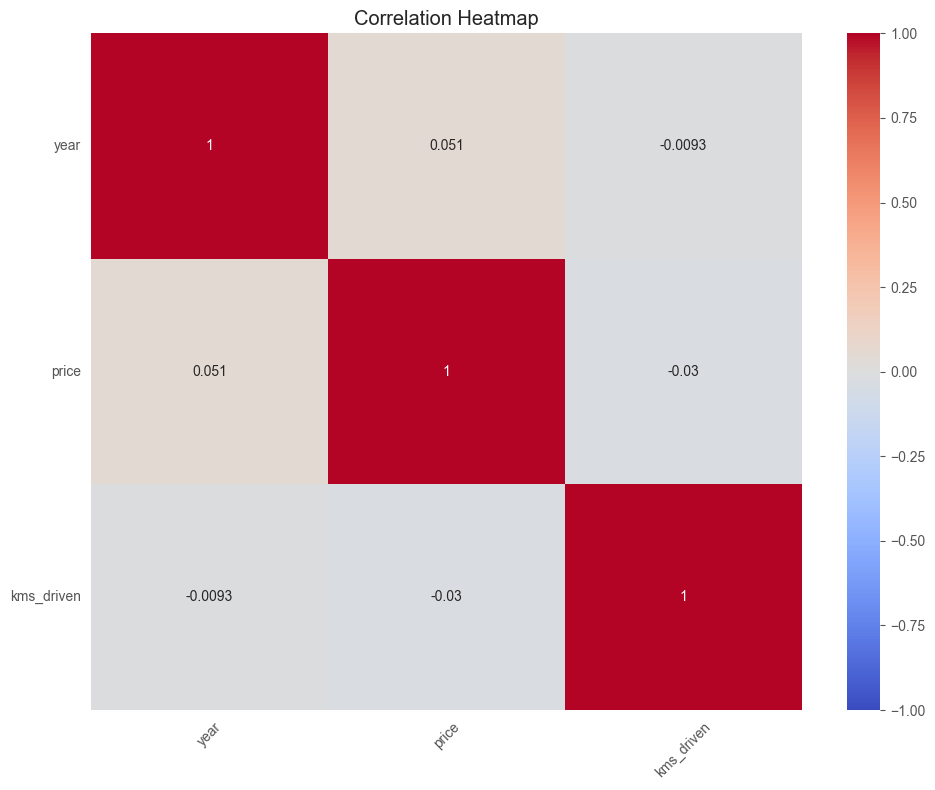

In [20]:
import seaborn as sns

# Вычисление корреляций
numeric_cols = ['year', 'price', 'kms_driven']
corr_matrix = data[numeric_cols].corr()

# Построение тепловой карты с помощью Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [21]:
# Преобразование столбца sale_date в datetime
data['sale_date'] = pd.to_datetime(data['sale_date'])

In [22]:
# Создание новых признаков: year_sold, month_sold
data['year_sold'] = data['sale_date'].dt.year
data['month_sold'] = data['sale_date'].dt.month

In [23]:
X=data[['name','company','year','kms_driven','fuel_type']]
y=data['price']

In [ ]:
X

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score